In [ ]:
from datetime import datetime
print("last update: {}".format(datetime.now())) 

last update: 2023-04-17 01:53:22.782467


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/PlantVillage-Corn.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
file_path = '/tmp/PlantVillage-Corn/With Augmentation'

In [ ]:
name_class = os.listdir(file_path)
name_class

['Corn___Common_rust',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___healthy',
 'Corn___Northern_Leaf_Blight']

In [ ]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [ ]:
filepaths

['/tmp/PlantVillage-Corn/With Augmentation/Corn___Common_rust/image (830).JPG',
 '/tmp/PlantVillage-Corn/With Augmentation/Corn___Common_rust/image (103).JPG',
 '/tmp/PlantVillage-Corn/With Augmentation/Corn___Common_rust/image (1036).JPG',
 '/tmp/PlantVillage-Corn/With Augmentation/Corn___Common_rust/image (1162).JPG',
 '/tmp/PlantVillage-Corn/With Augmentation/Corn___Common_rust/image (520).JPG',
 '/tmp/PlantVillage-Corn/With Augmentation/Corn___Common_rust/image (67).JPG',
 '/tmp/PlantVillage-Corn/With Augmentation/Corn___Common_rust/image (916).JPG',
 '/tmp/PlantVillage-Corn/With Augmentation/Corn___Common_rust/image (5).JPG',
 '/tmp/PlantVillage-Corn/With Augmentation/Corn___Common_rust/image (73).JPG',
 '/tmp/PlantVillage-Corn/With Augmentation/Corn___Common_rust/image (259).JPG',
 '/tmp/PlantVillage-Corn/With Augmentation/Corn___Common_rust/image (710).JPG',
 '/tmp/PlantVillage-Corn/With Augmentation/Corn___Common_rust/image (8).JPG',
 '/tmp/PlantVillage-Corn/With Augmentation/C

In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Common_rust',
 'Corn___Co

In [ ]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/tmp/PlantVillage-Corn/With Augmentation/Corn_...,Corn___healthy
1,/tmp/PlantVillage-Corn/With Augmentation/Corn_...,Corn___healthy
2,/tmp/PlantVillage-Corn/With Augmentation/Corn_...,Corn___Common_rust
3,/tmp/PlantVillage-Corn/With Augmentation/Corn_...,Corn___Northern_Leaf_Blight
4,/tmp/PlantVillage-Corn/With Augmentation/Corn_...,Corn___Cercospora_leaf_spot Gray_leaf_spot


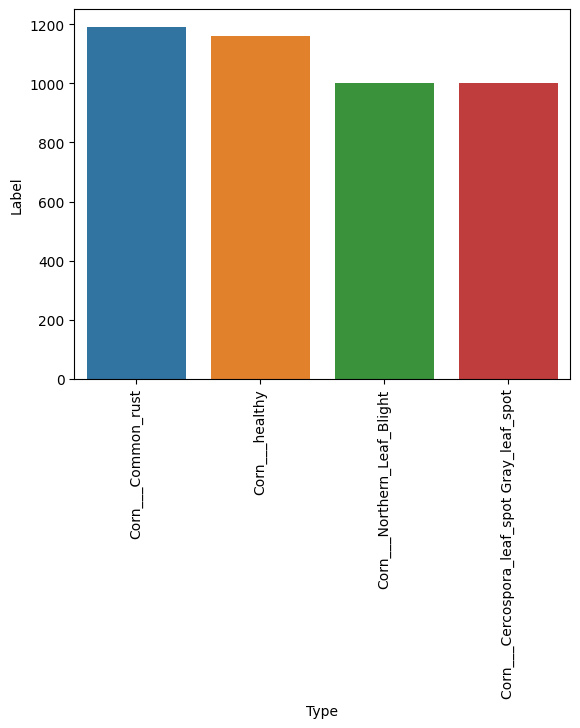

In [ ]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

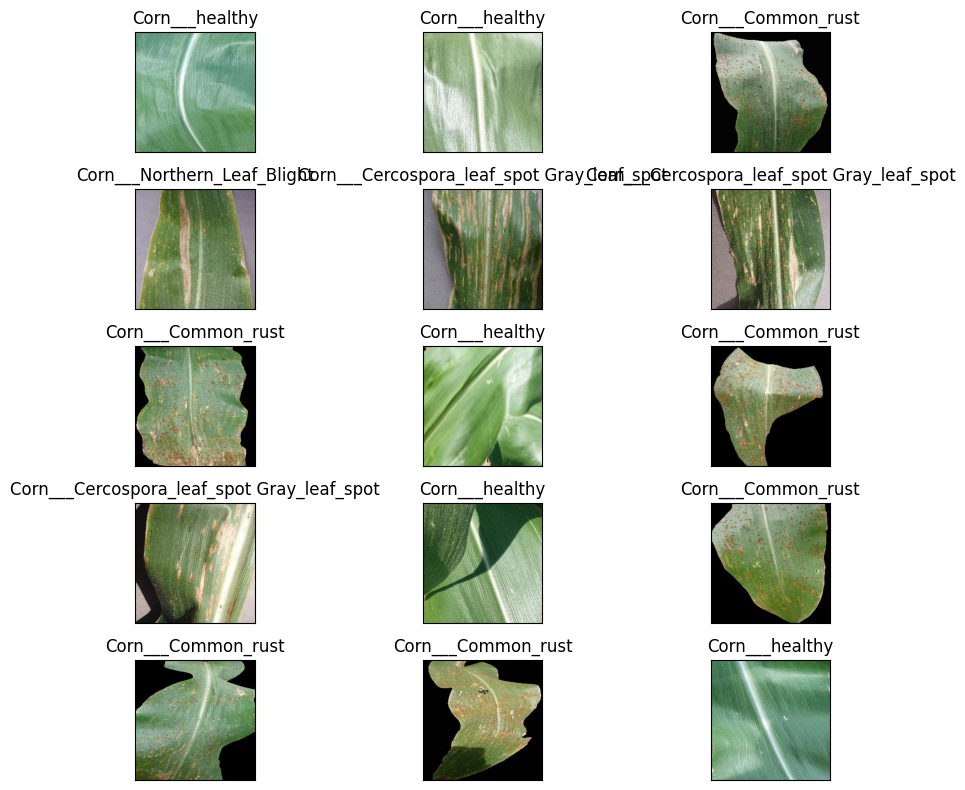

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 3265 validated image filenames belonging to 4 classes.
Found 1089 validated image filenames belonging to 4 classes.
Found 1089 validated image filenames belonging to 4 classes.


In [ ]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']       

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10
)

Epoch 1/10
103/103 [==============================] - 178s 2s/step - loss: 0.2759 - accuracy: 0.8802 - val_loss: 0.1658 - val_accuracy: 0.9366
Epoch 2/10
103/103 [==============================] - 212s 2s/step - loss: 0.1090 - accuracy: 0.9565 - val_loss: 0.1237 - val_accuracy: 0.9458
Epoch 3/10
103/103 [==============================] - 177s 2s/step - loss: 0.0795 - accuracy: 0.9688 - val_loss: 0.1316 - val_accuracy: 0.9440
Epoch 4/10
103/103 [==============================] - 215s 2s/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.1332 - val_accuracy: 0.9504
Epoch 5/10
103/103 [==============================] - 174s 2s/step - loss: 0.0324 - accuracy: 0.9871 - val_loss: 0.1544 - val_accuracy: 0.9559
Epoch 6/10
103/103 [==============================] - 173s 2s/step - loss: 0.0271 - accuracy: 0.9908 - val_loss: 0.1490 - val_accuracy: 0.9532
Epoch 7/10
103/103 [==============================] - 213s 2s/step - loss: 0.0116 - accuracy: 0.9954 - val_loss: 0.2138 - val_accuracy: 0.9449

In [ ]:
model.save("model_resnet50.h5")  

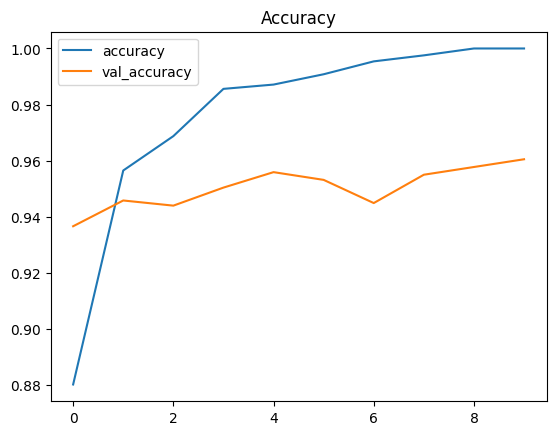

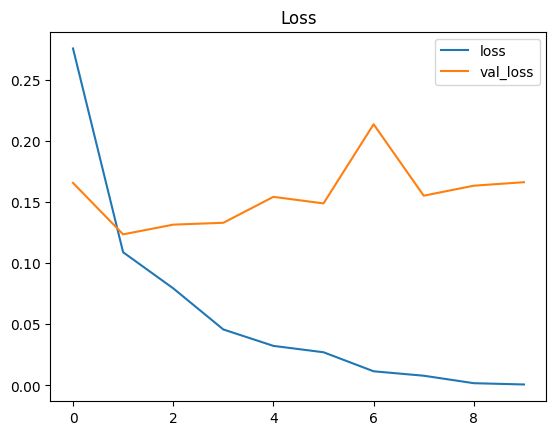

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.16638
Test Accuracy: 96.05%


In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

35/35 [==============================] - 51s 1s/step


In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                                            precision    recall  f1-score   support

Corn___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.89      0.92       255
                        Corn___Common_rust       1.00      1.00      1.00       283
               Corn___Northern_Leaf_Blight       0.90      0.94      0.92       260
                            Corn___healthy       0.99      1.00      1.00       291

                                  accuracy                           0.96      1089
                                 macro avg       0.96      0.96      0.96      1089
                              weighted avg       0.96      0.96      0.96      1089



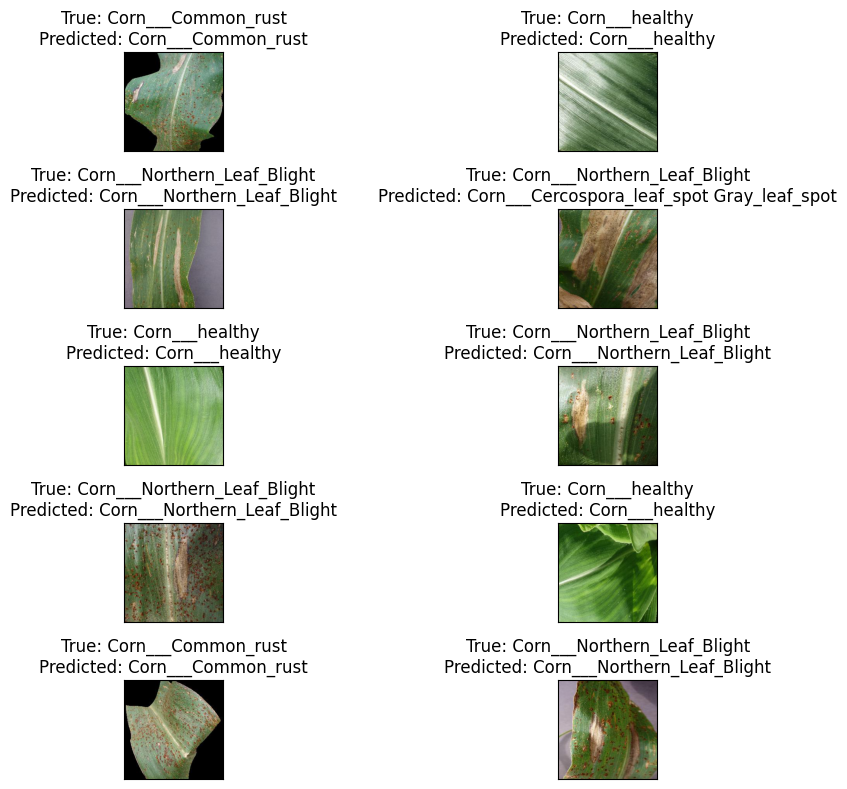

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
# More fine tuning the model
# Training the model after 140 layers
from tensorflow.keras import layers, optimizers
epochs = 10
split_at = 140
for layer in model.layers[:split_at]: layer.trainable = False
for layer in model.layers[split_at:]: layer.trainable = True   
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
batch_size=32
sgd = optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(
    train_gen,
    steps_per_epoch=train_gen.n//batch_size,
    validation_data=valid_gen,
    validation_steps=valid_gen.n//batch_size,
    epochs=epochs,
    verbose=1)

Epoch 1/10
102/102 [==============================] - 423s 4s/step - loss: 0.0936 - accuracy: 0.9678 - val_loss: 0.2116 - val_accuracy: 0.9467
Epoch 2/10
102/102 [==============================] - 407s 4s/step - loss: 0.0329 - accuracy: 0.9864 - val_loss: 0.1513 - val_accuracy: 0.9614
Epoch 3/10
102/102 [==============================] - 409s 4s/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.1469 - val_accuracy: 0.9577
Epoch 4/10
102/102 [==============================] - 411s 4s/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 0.1509 - val_accuracy: 0.9605
Epoch 5/10
102/102 [==============================] - 412s 4s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1466 - val_accuracy: 0.9642
Epoch 6/10
102/102 [==============================] - 372s 4s/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.1543 - val_accuracy: 0.9632
Epoch 7/10
102/102 [==============================] - 410s 4s/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.1488 - val_accuracy: 0.9632

In [ ]:
results = model.evaluate(test_gen, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.13831
Test Accuracy: 96.33%


In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

35/35 [==============================] - 46s 1s/step


In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                                            precision    recall  f1-score   support

Corn___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.94      0.93       255
                        Corn___Common_rust       1.00      1.00      1.00       283
               Corn___Northern_Leaf_Blight       0.94      0.90      0.92       260
                            Corn___healthy       0.99      1.00      0.99       291

                                  accuracy                           0.96      1089
                                 macro avg       0.96      0.96      0.96      1089
                              weighted avg       0.96      0.96      0.96      1089



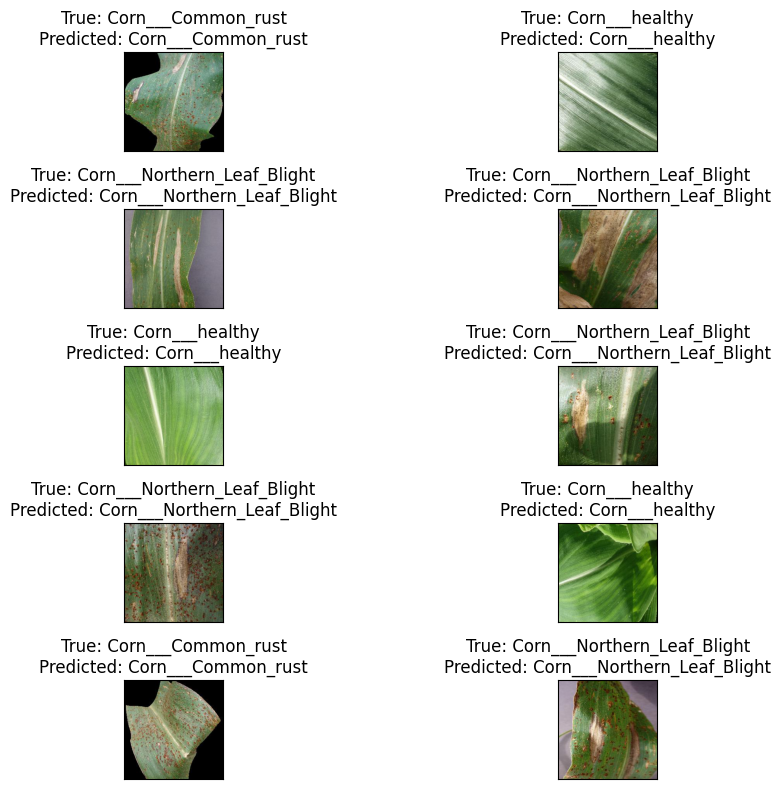

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()